# Tutoring SMDS 1
24 January 2025
Tutor: Valentina Macchiati
valentina.macchiati@sns.it


### Exercise 1

About 52% of American adults are women. Their height is approximately normally distributed with
a mean of 64.5 inches with a standard deviation of 2.7 inches. The average height of adult American
men is 69.1 inches with a standard deviation of 2.9 inches.
1- Draw a single random sample of 10 American adult heights. What is the
average height of your 10 Americans?
2- Repeat this random sample 1,000 times and calculate the average height for
each simulation.
3- Plot the histogram of your set of 1000 average heights. Add also the histogram of woman and men normal distribution.
4- Plot the cumulative distribution function

In [3]:
from random import choices
from scipy.stats import norm
import numpy as np

outcomes = ['F','M']
people = choices(outcomes, weights=[0.52, 1-0.52], k = 1000)
values, counts = np.unique(people, return_counts = True)

print(values)
print(counts)

['F' 'M']
[519 481]


In [4]:
women_height_sample = norm.rvs(loc = 64.5, scale = 2.7, size = counts[0])
men_height_sample = norm.rvs(loc = 69.1, scale = 2.9, size = counts[1])

##### 1

In [5]:
adult_height_sample = np.concatenate((women_height_sample, men_height_sample))
sample_10_americans = np.random.choice(adult_height_sample, size = 10, replace = False)

In [6]:
avg_height = np.mean(sample_10_americans)
print(avg_height)

66.66062201424843


##### 2

In [7]:
sample_avg_height = np.zeros(1000)
for i in range(1000):
    sample_10_americans_i = np.random.choice(adult_height_sample, size = 10, replace = False)
    avg_height_i = np.mean(sample_10_americans_i)
    sample_avg_height[i] = avg_height_i

print(sample_avg_height)

[66.14008546 65.35011652 65.38747031 67.12695111 65.7316147  66.38288905
 65.94991913 67.2783551  65.89206257 67.75991174 66.19966274 69.48860404
 64.85659831 66.24753315 66.30238615 67.5491858  68.09091548 68.11454973
 66.57317513 67.85302283 66.664694   65.32613978 66.58671809 68.97731421
 68.98812631 67.35343009 66.90491505 65.6542186  66.54027839 69.62918602
 66.36215227 66.5562554  65.936405   65.25316956 64.70072371 67.58352126
 65.29662402 67.56571984 67.03959179 68.60894601 66.53891161 66.26464708
 65.74729574 67.92715642 66.12728109 66.60842046 69.02168507 68.61539605
 66.61719595 67.72579509 66.33261748 65.8595315  66.65717137 67.36211903
 65.38088387 66.95028968 67.82009915 65.93106    65.66600343 66.11459313
 67.01099191 66.15269634 66.95062275 66.93906494 65.88182552 66.11302296
 64.46710969 68.02869481 66.727203   68.18319013 67.64297468 68.31525383
 65.77955544 69.06980014 69.38456157 65.66130659 66.17509061 69.03221767
 66.44170105 67.27308523 66.13869737 65.70452729 67

##### 3

In [9]:
import matplotlib.pyplot as plt

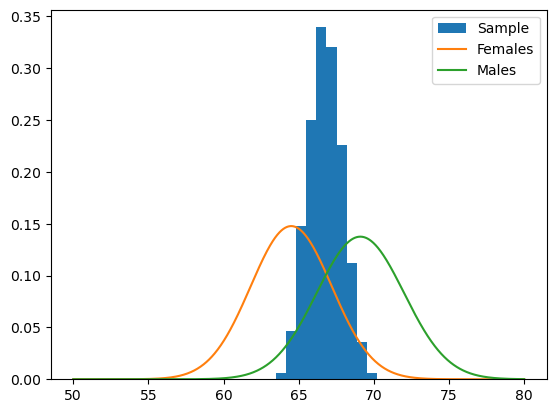

In [13]:
plt.hist(sample_avg_height, density=True, label = 'Sample')
plt.plot(np.linspace(50,80,1000),norm.pdf(np.linspace(50,80,1000), loc = 64.5, scale = 2.7), label = 'Females')
plt.plot(np.linspace(50,80,1000),norm.pdf(np.linspace(50,80,1000), loc = 69.1, scale = 2.9), label = 'Males')
plt.legend()

##### 4

[]

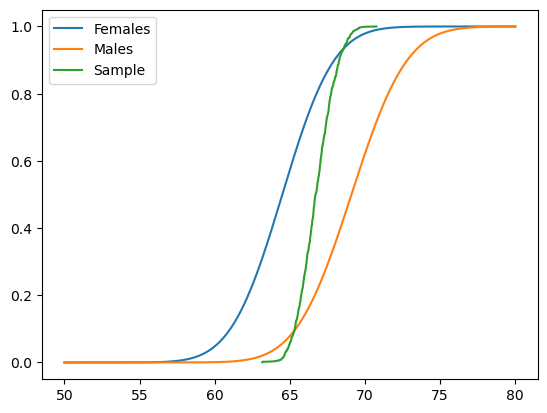

In [11]:
plt.plot(np.linspace(50,80,1000),norm.cdf(np.linspace(50,80,1000), loc = 64.5, scale = 2.7), label = 'Females')
plt.plot(np.linspace(50,80,1000),norm.cdf(np.linspace(50,80,1000), loc = 69.1, scale = 2.9), label = 'Males')
plt.plot(np.sort(sample_avg_height), np.arange(1,len(sample_avg_height)+1)/len(sample_avg_height), label = 'Sample')
plt.legend()
plt.plot()

### Exercise 2

If you have a population with mean MEAN and standard deviation STD and take sufficiently large random samples from the population, then the distribution of the sample mean will be approximately normally distributed. We will see this fact in
the case that the population is uniformly distributed over the interval [0; 1].

1- draw 200 samples of size 100 from a uniform distribution and save them in a matrix M.

2- compute the sample mean for each of the 200 samples created in the previous point.

3- draw a histogram of the 200 sample means, using hist.

4- plot a QQ plot against Gaussian quantiles to check whether the sample is normal.

In [16]:
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm

##### 1

In [18]:
M = np.empty(200, dtype='object')
for i in range(200):
    sample_uniform = uniform.rvs(loc = 0, scale = 1, size = 100)
    M[i] = sample_uniform

##### 2

In [19]:
M_avg = np.zeros(200)
for i in range(200):
    M_avg[i] = np.mean(M[i])

##### 3

(array([ 1.,  5.,  8., 13., 35., 42., 37., 18., 24., 17.]),
 array([0.41657782, 0.43131919, 0.44606057, 0.46080195, 0.47554333,
        0.49028471, 0.50502609, 0.51976747, 0.53450884, 0.54925022,
        0.5639916 ]),
 <BarContainer object of 10 artists>)

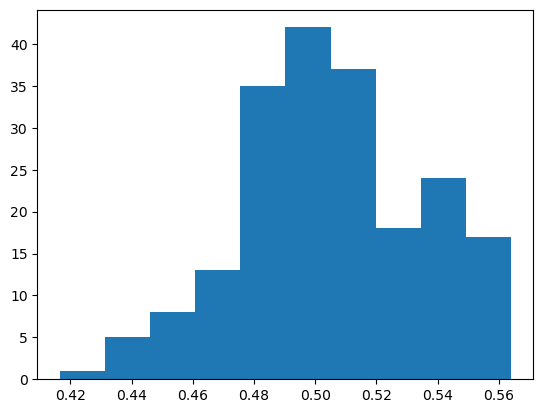

In [58]:
plt.hist(M_avg)

##### 4

In [64]:
M_avg_z = (M_avg - np.mean(M_avg))/np.std(M_avg)

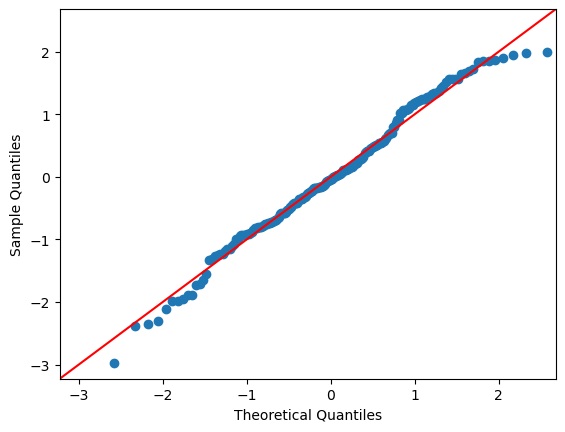

In [67]:
sm.qqplot(M_avg_z, line = '45')
plt.show()

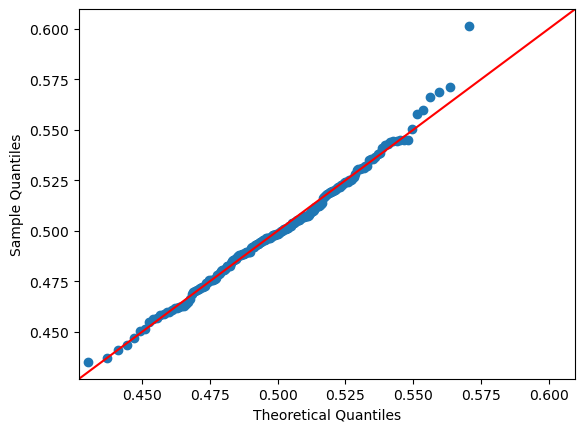

In [21]:
# or equivalently

sm.qqplot(M_avg, norm(loc = np.mean(M_avg), scale = np.std(M_avg)) ,line = '45')
plt.show()

### Exercise 3

Given the results of a chemical analysis of wines grown in the same region in Italy (derived from three different cultivars), a researcher wants to analyze the relationship between the 13 constituents found. Dataset: sklearn.datasets.load_wine (https://scikit-learn.org/1.6/modules/generated/sklearn.datasets.load_wine.html)

1- compute the average, variance, std deviation, covariance (and plot heatmap) and Quartiles

2- are 'total_phenols' and 'color_intensity' correlated? Is significant (95%)?

3- compute pearson correlation coefficient (and plot heatmap) between all 13 variables

4- use the linear regression model to describe the data above: y='alcohol', x= 'color intensity' and then plot (scatterplot)

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
wines = pd.read_csv('wine.csv')
wines

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


##### 1

In [29]:
pd.concat([wines.agg(['mean', 'var', 'std']), wines.quantile([0.25, 0.5, 0.75])])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
var,0.659062,1.248015,0.075265,11.152686,203.989335,0.391690,0.997719,0.015489,0.327595,5.374449,0.052245,0.504086,99166.717355
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
0.25,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
0.5,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
0.75,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000


In [14]:
wines.cov()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
malic_acid,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
ash,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
alcalinity_of_ash,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
magnesium,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
total_phenols,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
flavanoids,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
nonflavanoid_phenols,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
proanthocyanins,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334
color_intensity,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480


<Axes: >

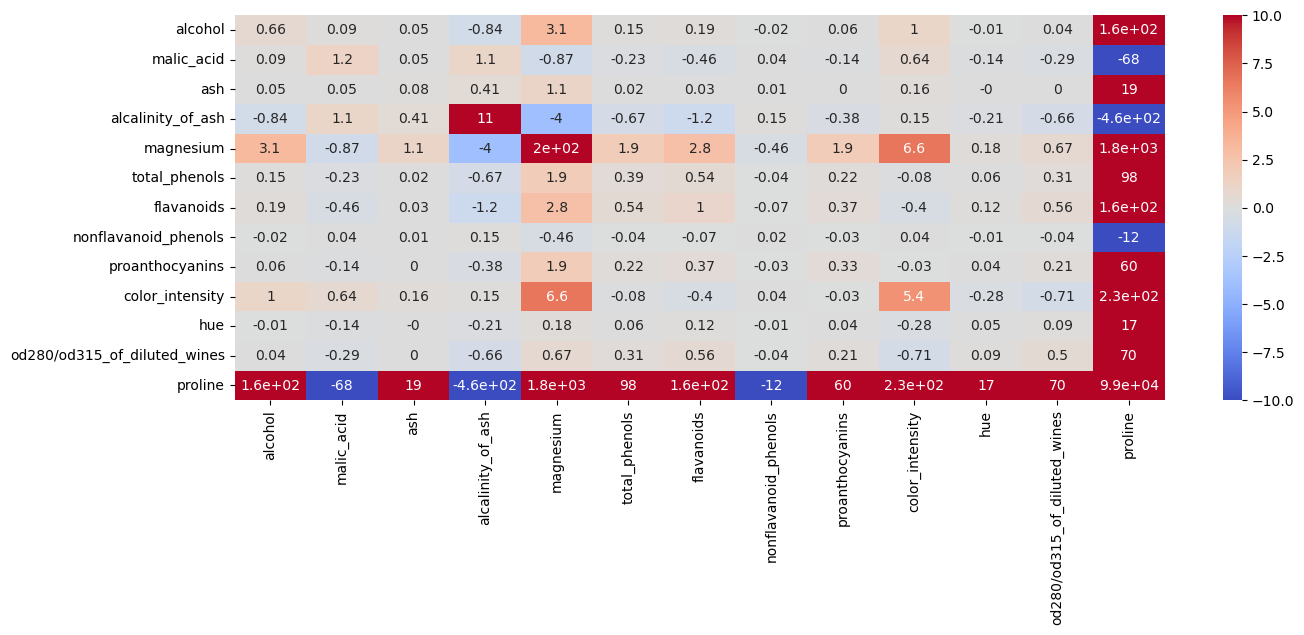

In [34]:
plt.figure(figsize=(15, 5)) # (larghezza, altezza)
sns.heatmap(round(wines.cov(), 2), annot=True, cmap='coolwarm',vmin=-10,vmax=10)

##### 2

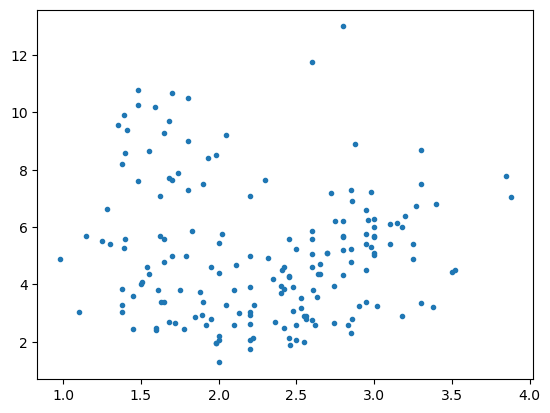

In [3]:
plt.plot(wines['total_phenols'], wines['color_intensity'], '.')

In [4]:
stats.pearsonr(wines['total_phenols'].values, wines['color_intensity'].values)

PearsonRResult(statistic=-0.055136417742365995, pvalue=0.46478814552968223)

In [13]:
stats.spearmanr(wines['total_phenols'].values, wines['color_intensity'].values)

SignificanceResult(statistic=0.011161793956834237, pvalue=0.8824435092354216)

The Spearman's correlation gives 0.01. Our null hypothesis is that there is no correlation. The result of the p-value tells us that if that the data are non correlated, there is a probability of 88% of obtaining a similar or less compatible (with respect to the null hypothesis) result (i.e. greater correlation). Moreover p > 0.05. Therefore there is no sufficient evidence to reject the null hypothesis.

To sum up, the correlation is not statistically significant at $95$% confidence level.

##### 3

<Axes: >

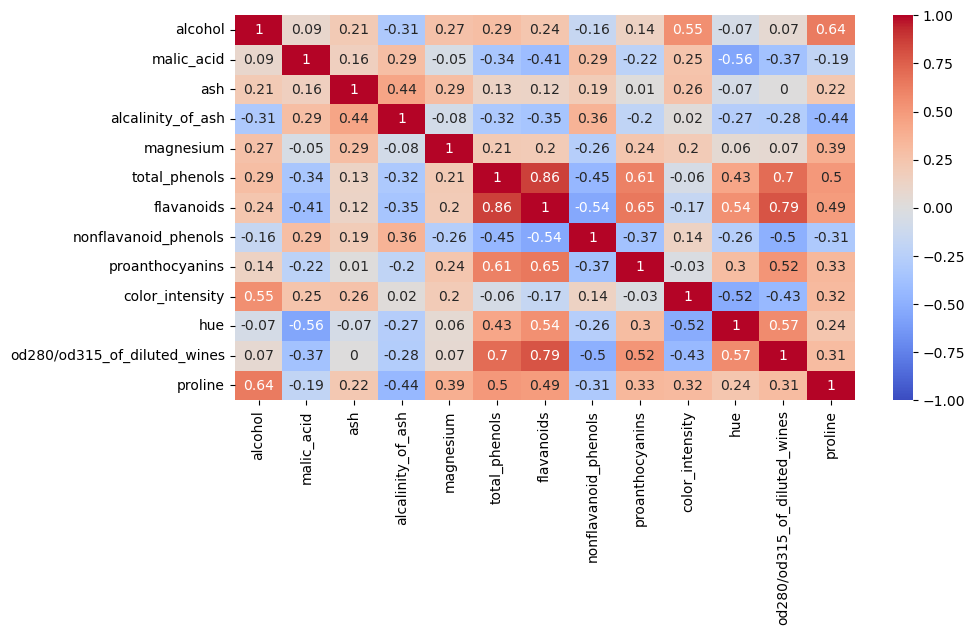

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(wines.corr().round(2),annot=True,cmap='coolwarm',vmin=-1,vmax=1) #By default .corr() calculates the Pearson's one

### Exercise 4

Suppose we observe n realizations $y_1,y_2,...,y_n$ of n independent random variable, $Y_1,Y_2,...,Y_n$ all having a normal distribution with mean $\mu_Y$ and variance $\sigma^2_Y$.
 Consider the following alternative estimator for $\mu_Y$ , the mean of the $Y_i$:

$YY=\frac{1}{n-c}\sum_{i=1}^{n} Y_i$

where c > 0.
We want to illustrate that this estimator is a biased estimator for $\mu_Y$ .

Fix c=1 and implement the estimator above

1- Randomly draw 5 observations from the Normal distribution with mean 10 and variance 25 and compute an estimate using YY. Repeat this procedure 10000 times.

2- Plot a histogram of YY.

3- A simple computation shows that $E[YY]=\frac{n}{n-1}\mu_Y$
Is YY biased or unbiased? Is YY asymptotically unbiased? Motivate your answer.

##### 1

In [22]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [23]:
mu = 10
sigma = np.sqrt(25)
n = 5

YY_arr = np.zeros(10000)

for j in range(10000):
    Y_i = norm.rvs(loc = mu, scale = sigma, size = n)
    YY = 1/(n - 1) * np.sum(Y_i)
    YY_arr[j] = YY

##### 2

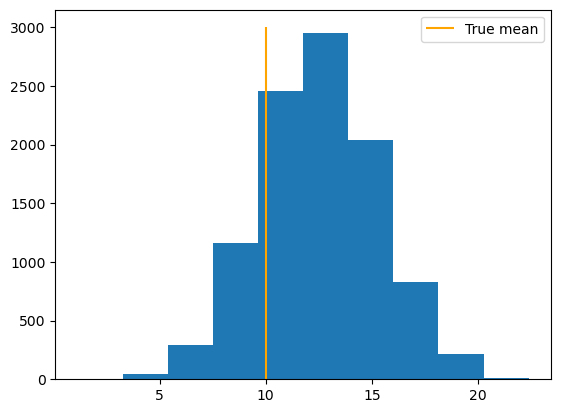

In [25]:
plt.hist(YY_arr)
plt.vlines(10,0,3000,color='orange',label='True mean')
plt.legend()

##### 3

Since $E[YY] = \frac{n}{n-1}\mu_{Y} \neq \mu_{Y}$ then this estimator is biased. But it is asymptotically unbiased since $\lim_{n \rightarrow \infty}\frac{n}{n-1}\mu_{Y} = \mu_{Y}$. 